# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata , study_results, on= "Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].value_counts()
mice_count

Mouse ID
g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: count, Length: 249, dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
print("Duplicate mice based on Mouse ID and Timepoint:")
print(duplicates[['Mouse ID', 'Timepoint']])


Duplicate mice based on Mouse ID and Timepoint:
    Mouse ID  Timepoint
908     g989          0
909     g989          0
910     g989          5
911     g989          5
912     g989         10
913     g989         10
914     g989         15
915     g989         15
916     g989         20
917     g989         20


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicate_mouse_ID = duplicates['Mouse ID'].iloc[0]
all_data_duplicate_mouse = combined_data[combined_data['Mouse ID'] == duplicate_mouse_ID]
print("All data for the duplicate Mouse ID:", duplicate_mouse_ID)
print(all_data_duplicate_mouse)


All data for the duplicate Mouse ID: g989
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propr

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_combined_data = combined_data.drop_duplicates(subset=["Mouse ID"],keep="first")
clean_combined_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_unique_mice = clean_combined_data["Mouse ID"].nunique()
number_of_unique_mice

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
                                                       
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)
summary_stats



,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])  
summary_stats.columns =  ['Mean', 'Median', 'Variance', 'Std', 'SEM']
                       
summary_stats

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

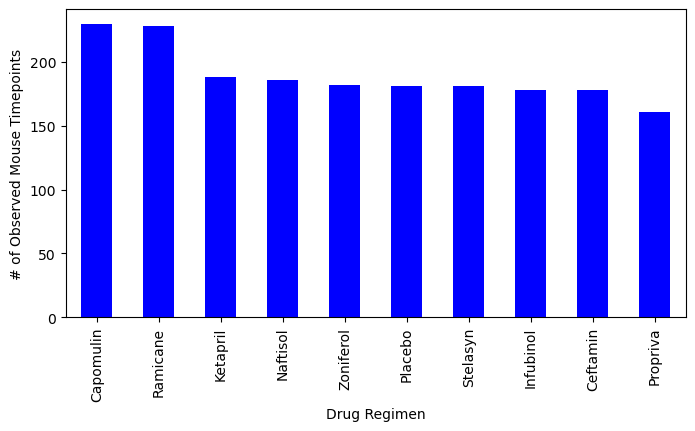

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = combined_data["Drug Regimen"].value_counts()
regimen_counts.plot(kind='bar', figsize=(8,4), color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

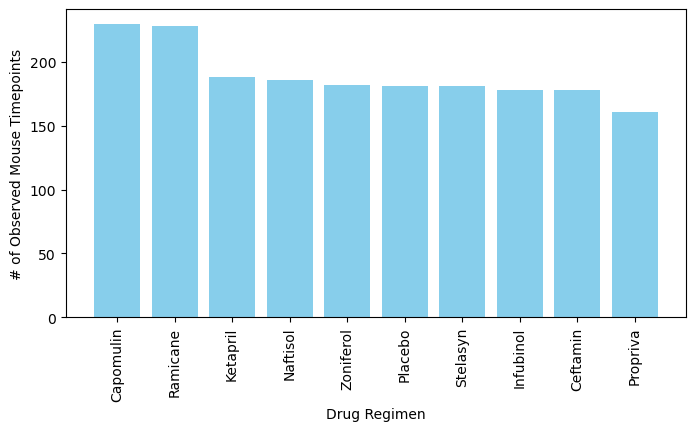

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Generate a bar plot using pyplot
regimen_counts = combined_data["Drug Regimen"].value_counts()
plt.figure(figsize=(8,4))
plt.bar(regimen_counts.index,regimen_counts.values,color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

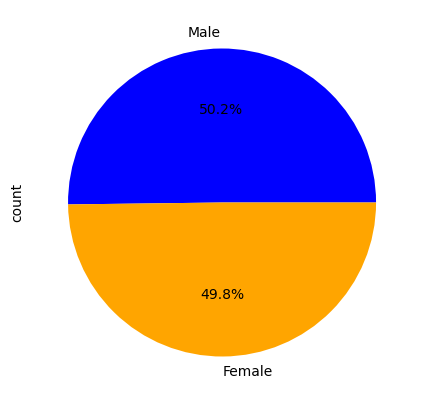

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = combined_data[['Mouse ID','Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart

gender_counts.plot(kind='pie',autopct='%1.1f%%',colors=['blue','orange'],startangle=0,figsize=(8,5))

plt.axis('on')  
plt.ylabel('count') 

plt.show()


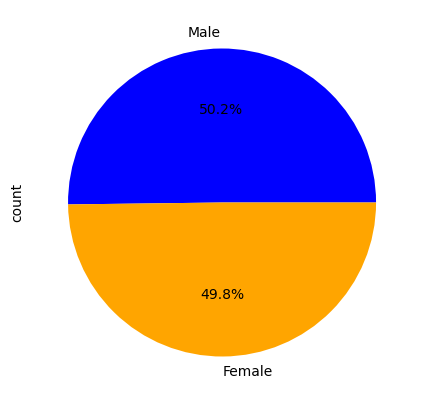

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = combined_data[['Mouse ID','Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()


# Make the pie chart
plt.figure(figsize=(8,5))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',colors=['blue','orange'],startangle=0)

plt.axis('on')  
plt.ylabel('count') 

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint = combined_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_data = pd.merge(last_timepoint,combined_data, on=['Mouse ID','Timepoint'], how='inner')
filtered_data = merged_data[merged_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
filtered_data



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes=[]
outlier_data={}

 # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments: 
    treatment_data = filtered_data[filtered_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq


    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
   
    # add subset
    tumor_volumes.append(treatment_data)

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]


    print(f"{treatment} potential outliers:{outliers}")
   
 

Capomulin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


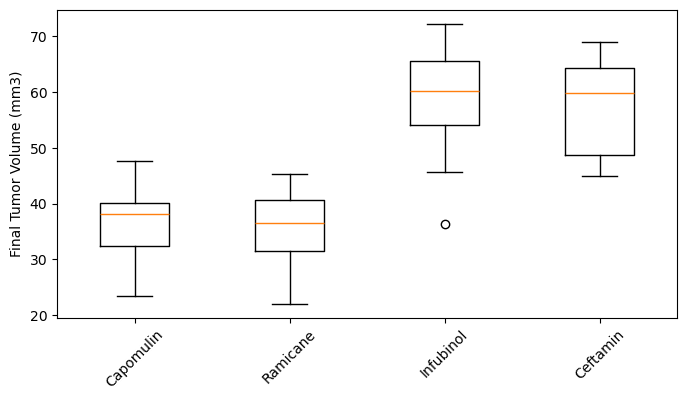

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize=(8,4))
plt.boxplot(tumor_volumes, labels=treatments)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.show()


## Line and Scatter Plots

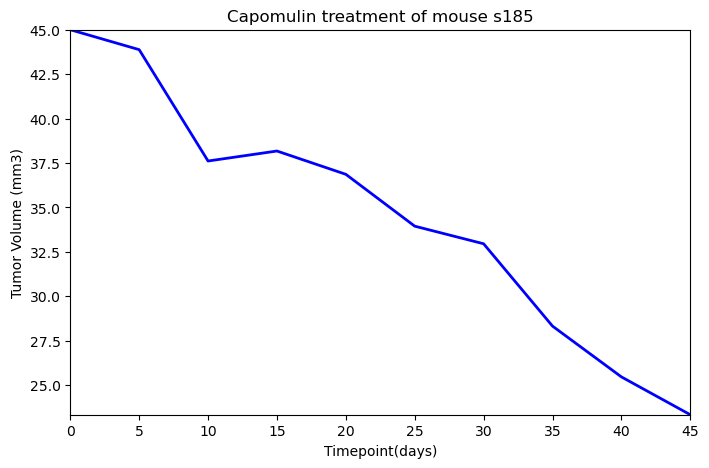

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 's185'

mouse_data = combined_data[
    (combined_data['Mouse ID'] == mouse_id) & 
    (combined_data['Drug Regimen'] == 'Capomulin')
]

mouse_data = mouse_data.sort_values(by='Timepoint')

plt.figure(figsize=(8,5))
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'], linestyle ='-',color='blue',linewidth=2)

plt.xlim(min(mouse_data['Timepoint']),max(mouse_data['Timepoint']))
plt.ylim(min(mouse_data['Tumor Volume (mm3)']),max(mouse_data['Tumor Volume (mm3)']))


plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse s185')
plt.show()


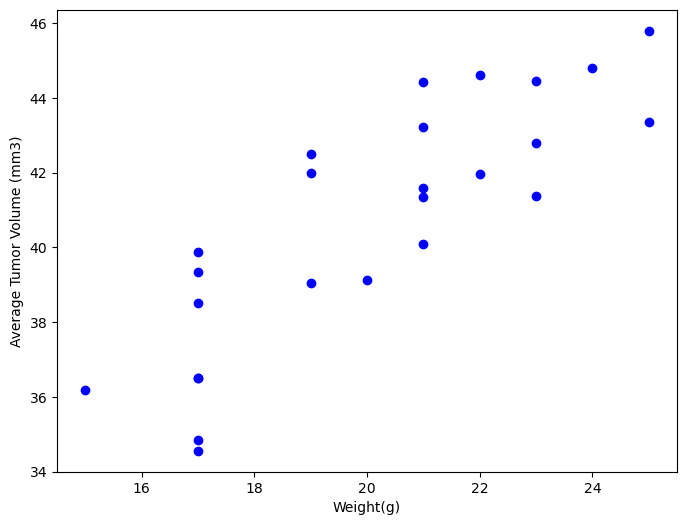

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
mouse_weight = capomulin_data[['Mouse ID','Weight (g)']].drop_duplicates().reset_index(drop=True)
merged_data = pd.merge(average_tumor_volume,mouse_weight, on='Mouse ID')

plt.figure(figsize=(8,6))
plt.scatter(merged_data['Weight (g)'],merged_data['Tumor Volume (mm3)'],color='blue')

plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.
0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64
y = 0.95x +21.55


C:\Users\weiwei\AppData\Local\Temp\ipykernel_8896\2058071019.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(merged_data['Weight (g)'],regress_values, "r-", color='red')


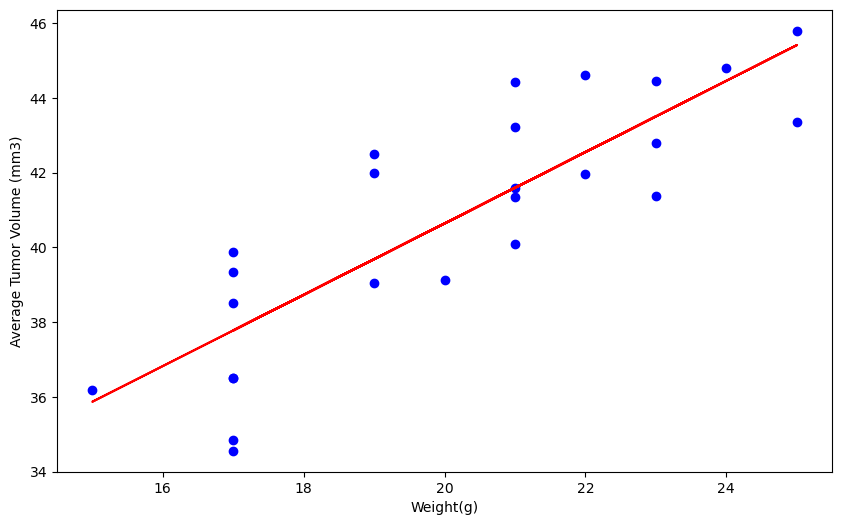

In [32]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np
correlation = np.corrcoef(merged_data['Weight (g)'],merged_data['Tumor Volume (mm3)'])[0,1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}.")
slope,intercept,r_value,p_value,std_err = st.linregress(merged_data['Weight (g)'],merged_data['Tumor Volume (mm3)'])
regress_values = slope * merged_data['Weight (g)'] + intercept
print(regress_values) 

line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line)

plt.figure(figsize=(10,6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')
plt.plot(merged_data['Weight (g)'],regress_values, "r-", color='red')

plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()